In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from textwrap import wrap
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.3
pandas version :  1.3.2
seaborn version :  0.11.2


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [101]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Weight_in_gms','Discount_offered','Reached.on.Time_Y.N']

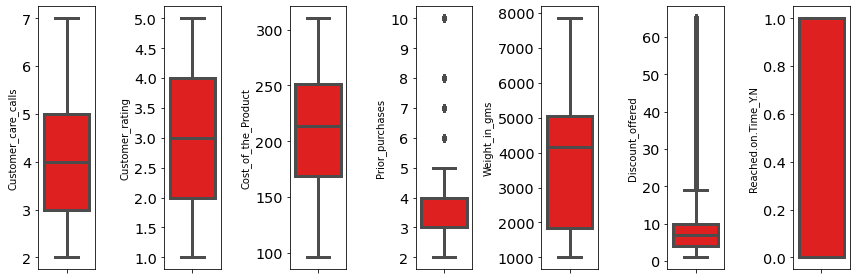

In [6]:
# Box Plot (Numerical)

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='red', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `Prior_purchases`, dan `Discount_offered`terlihat sangat skewed.
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `Customer_care_calls`, `Cost_of_the_Product` dan `Weight_in_gms`.

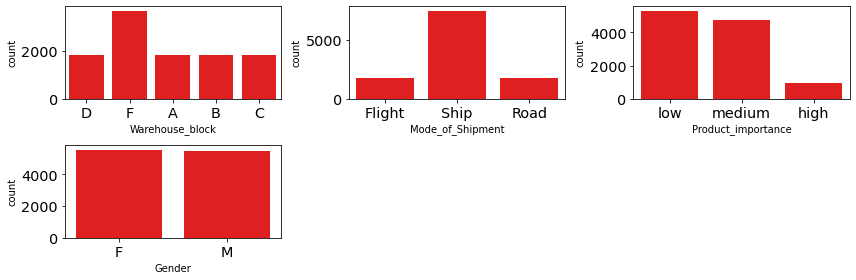

In [7]:
# Count Plot (Categorical)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='red', orient='v')
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi `Warehouse_block` , dan `Mode_of_Shipment` didominasi 1 value sedangkan `Product_importance` didominasi oleh 2 value.

## Outlier (Transfrom log)
std-> ukuran sebaran dari data

tidak dalam semua kasus harus remove outlier:
    -apakah outlier tersebut data error -> remove data tersebut
    -memang sebaran datanya seperti itu -> jangan meremove

In [8]:
df['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

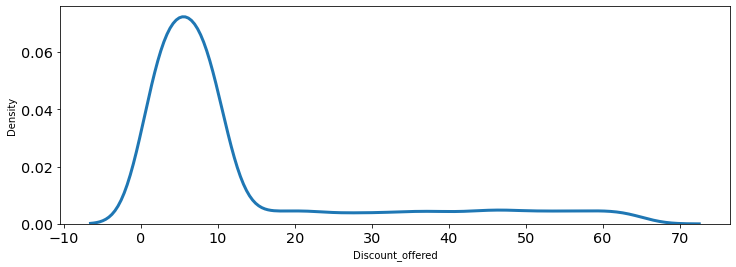

In [9]:
sns.kdeplot(df['Discount_offered'])

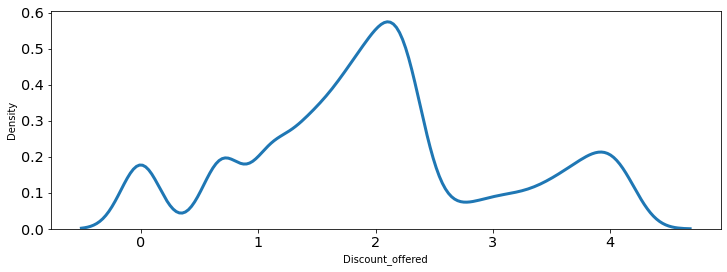

In [10]:
a=sns.kdeplot(np.log(df['Discount_offered']))

In [11]:
df['Log_discount_offered'] = np.log(df['Discount_offered'])

In [12]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641


In [13]:
max_thresold = df['Log_discount_offered'].quantile(0.99)
max_thresold

4.143134726391533

In [14]:
df[df['Log_discount_offered']> max_thresold]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered
60,61,D,Ship,3,1,221,3,low,F,64,2794,1,4.158883
111,112,B,Road,4,2,239,3,low,F,65,3679,1,4.174387
122,123,A,Road,4,2,160,3,low,M,64,1714,1,4.158883
158,159,A,Ship,5,5,205,2,high,M,65,3671,1,4.174387
240,241,D,Ship,4,5,270,4,low,M,65,1818,1,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,2948,F,Ship,2,2,193,3,medium,M,64,2867,1,4.158883
3017,3018,F,Flight,4,1,235,2,high,M,64,2107,1,4.158883
3040,3041,C,Ship,3,2,149,3,medium,F,64,1920,1,4.158883
3068,3069,A,Ship,4,3,139,3,low,M,64,1814,1,4.158883


In [15]:
min_thresold = df['Log_discount_offered'].quantile(0.05)
min_thresold

0.0

<AxesSubplot:xlabel='Prior_purchases', ylabel='Density'>

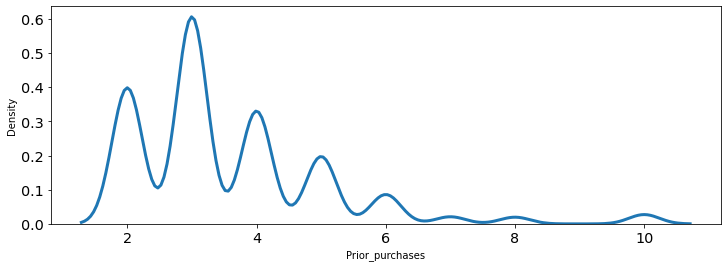

In [16]:
sns.kdeplot(df['Prior_purchases'])

<AxesSubplot:xlabel='Prior_purchases', ylabel='Density'>

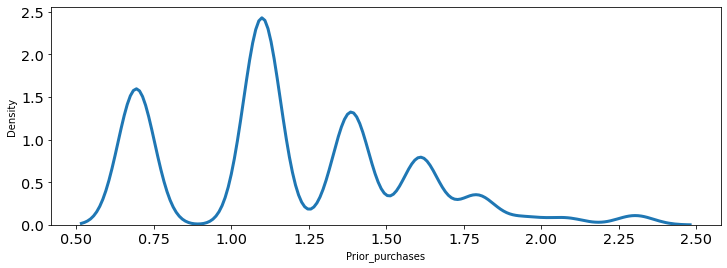

In [17]:
sns.kdeplot(np.log(df['Prior_purchases']))

In [18]:
df['Log_Prior_purchases'] = np.log(df['Prior_purchases'])

In [19]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered,Log_Prior_purchases
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612


<AxesSubplot:xlabel='Customer_care_calls', ylabel='Density'>

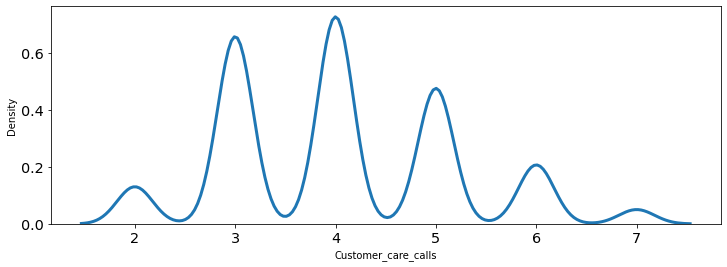

In [20]:
sns.kdeplot(df['Customer_care_calls'])

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Density'>

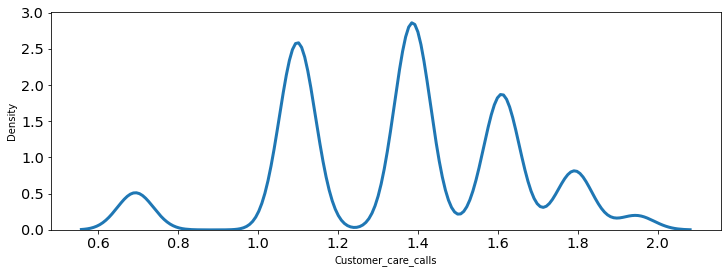

In [21]:
sns.kdeplot(np.log(df['Customer_care_calls']))

In [22]:
df['Log_Customer_care_calls'] = np.log(df['Customer_care_calls'])

In [23]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147


<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Density'>

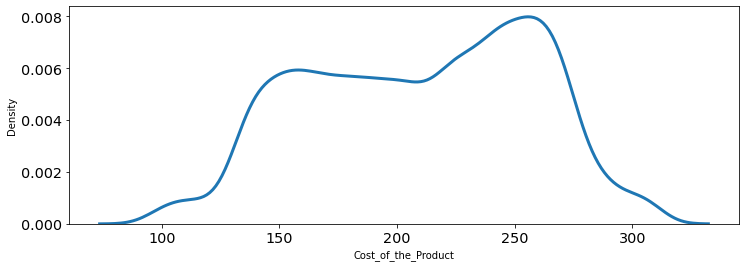

In [24]:
sns.kdeplot(df['Cost_of_the_Product'])

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Density'>

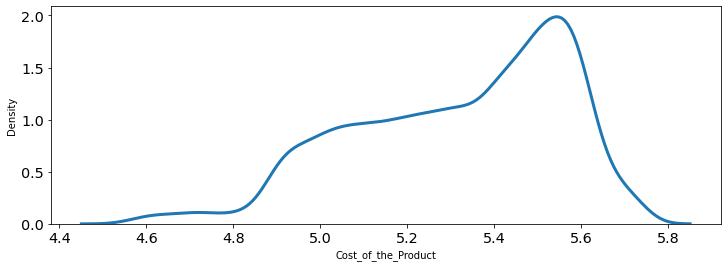

In [25]:
sns.kdeplot(np.log(df['Cost_of_the_Product']))

In [26]:
df['Log_Cost_of_the_Product'] = np.log(df['Cost_of_the_Product'])

In [27]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Cost_of_the_Product
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294,5.176150
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294,5.375278
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147,5.209486
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612,5.170484
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147,5.214936


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

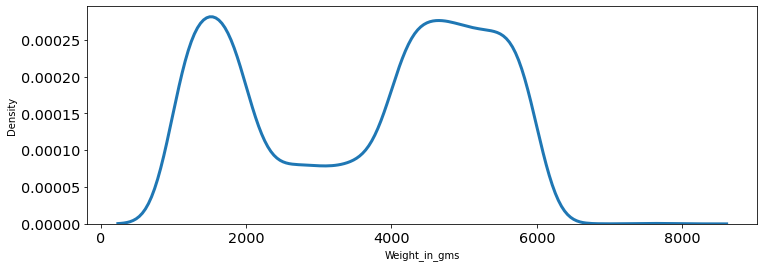

In [28]:
sns.kdeplot(df['Weight_in_gms'])

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

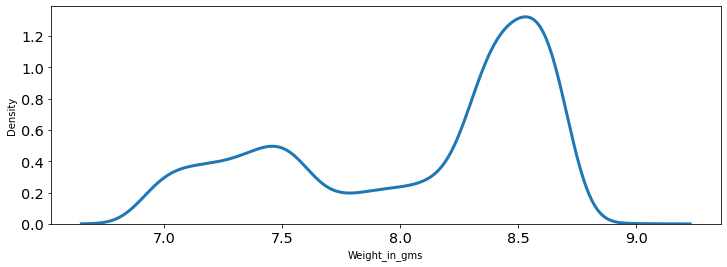

In [29]:
sns.kdeplot(np.log(df['Weight_in_gms']))

In [30]:
df['Log_Weight_in_gms'] = np.log(df['Weight_in_gms'])

In [31]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Cost_of_the_Product,Log_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294,5.176150,7.117206
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294,5.375278,8.035279
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147,5.209486,8.123854
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612,5.170484,7.070724
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147,5.214936,7.817625


In [32]:
a=['Discount_offered','Log_discount_offered']

In [33]:
b=['Prior_purchases','Log_Prior_purchases']

In [34]:
c=['Customer_care_calls','Log_Customer_care_calls']

In [35]:
d=['Cost_of_the_Product','Log_Cost_of_the_Product']

In [36]:
e=['Weight_in_gms','Log_Weight_in_gms']

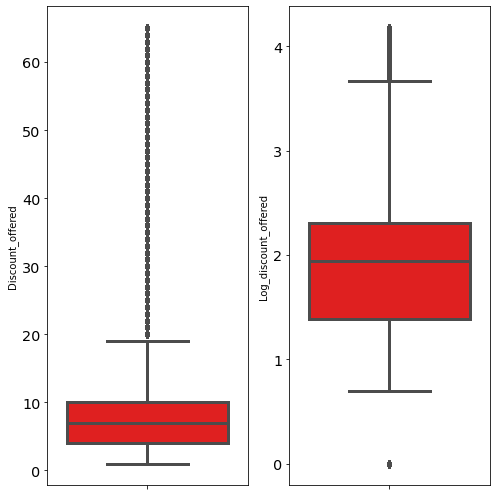

In [37]:
# Box Plot (Numerical)
plt.figure(figsize=(7,7))
for i in range(0, len(a)):
    plt.subplot(1, len(a), i+1)
    sns.boxplot(y=df[a[i]], color='red', orient='v')
    plt.tight_layout()

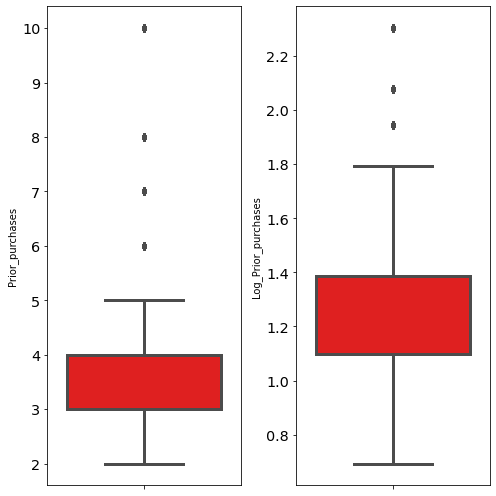

In [38]:
### Box Plot (Numerical)
plt.figure(figsize=(7,7))
for i in range(0, len(b)):
    plt.subplot(1, len(b), i+1)
    sns.boxplot(y=df[b[i]], color='red', orient='v')
    plt.tight_layout()

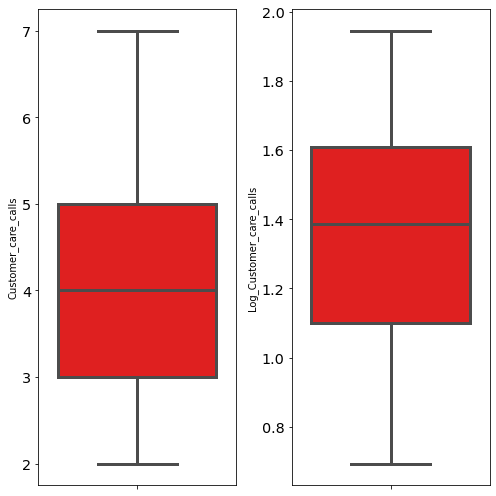

In [39]:
### Box Plot (Numerical)
plt.figure(figsize=(7,7))
for i in range(0, len(c)):
    plt.subplot(1, len(c), i+1)
    sns.boxplot(y=df[c[i]], color='red', orient='v')
    plt.tight_layout()

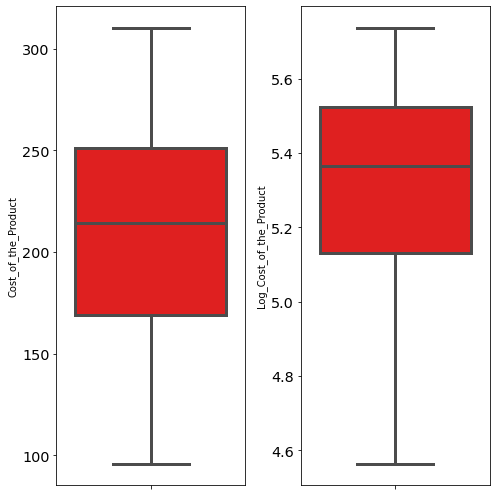

In [40]:
### Box Plot (Numerical)
plt.figure(figsize=(7,7))
for i in range(0, len(d)):
    plt.subplot(1, len(d), i+1)
    sns.boxplot(y=df[d[i]], color='red', orient='v')
    plt.tight_layout()

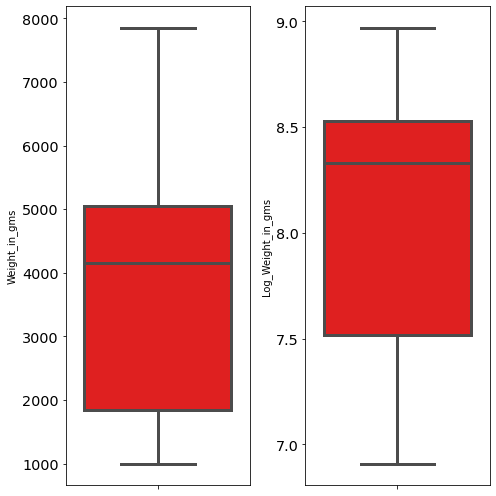

In [41]:
### Box Plot (Numerical)
plt.figure(figsize=(7,7))
for i in range(0, len(e)):
    plt.subplot(1, len(e), i+1)
    sns.boxplot(y=df[e[i]], color='red', orient='v')
    plt.tight_layout()

In [42]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Cost_of_the_Product,Log_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294,5.176150,7.117206
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294,5.375278,8.035279
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147,5.209486,8.123854
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612,5.170484,7.070724
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147,5.214936,7.817625


Rename target columns menjadi 'Late' karena 1=Late, 0=On Time

In [43]:
df.rename(columns={'Reached.on.Time_Y.N': 'Late'}, inplace=True)

In [44]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Cost_of_the_Product,Log_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294,5.176150,7.117206
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294,5.375278,8.035279
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147,5.209486,8.123854
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612,5.170484,7.070724
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147,5.214936,7.817625


#Categorical
-Warehouse_block & Mode_of_Shipment didominasi 1 value # One-hot Encoding
-Product_importance didominasi oleh 2 value # Label Encoding 

In [45]:
df1=['Warehouse_block','Mode_of_Shipment','Log_Customer_care_calls','Customer_rating','Cost_of_the_Product','Log_Prior_purchases','Product_importance','Gender','Log_discount_offered','Weight_category1','Late']

In [46]:
df1

['Warehouse_block',
 'Mode_of_Shipment',
 'Log_Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Log_Prior_purchases',
 'Product_importance',
 'Gender',
 'Log_discount_offered',
 'Weight_category1',
 'Late']

In [47]:
df2 = df.copy()

In [48]:
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Cost_of_the_Product,Log_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294,5.176150,7.117206
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294,5.375278,8.035279
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147,5.209486,8.123854
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612,5.170484,7.070724
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147,5.214936,7.817625


In [49]:
df2['Log_Weight_in_gms'].describe()

count    10999.000000
mean         8.063865
std          0.557051
min          6.908755
25%          7.517249
50%          8.330623
75%          8.527144
max          8.967759
Name: Log_Weight_in_gms, dtype: float64

In [50]:
df3 = df2.drop(['ID','Log_Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms'], axis=1)

In [51]:
df1

['Warehouse_block',
 'Mode_of_Shipment',
 'Log_Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Log_Prior_purchases',
 'Product_importance',
 'Gender',
 'Log_discount_offered',
 'Weight_category1',
 'Late']

In [52]:
df3.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Weight_in_gms
0,D,Flight,4,2,177,low,F,1,3.784190,1.098612,1.386294,7.117206
1,F,Flight,4,5,216,low,M,1,4.077537,0.693147,1.386294,8.035279
2,A,Flight,2,2,183,low,M,1,3.871201,1.386294,0.693147,8.123854
3,B,Flight,3,3,176,medium,M,1,2.302585,1.386294,1.098612,7.070724
4,C,Flight,2,2,184,medium,F,1,3.828641,1.098612,0.693147,7.817625


In [53]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Cost_of_the_Product,Log_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3.784190,1.098612,1.386294,5.176150,7.117206
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4.077537,0.693147,1.386294,5.375278,8.035279
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,3.871201,1.386294,0.693147,5.209486,8.123854
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.302585,1.386294,1.098612,5.170484,7.070724
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3.828641,1.098612,0.693147,5.214936,7.817625


In [54]:
# One-hot Encoding (Warehouse_block & Mode_of_Shipment didominasi 1 value)
def onehot_encode(df3, column):
    dummies = pd.get_dummies(df3[column], prefix=column, drop_first=True)
    df3 = pd.concat([df3, dummies], axis=1)
    df3 = df3.drop(column, axis=1)
    return df3

for column in ['Warehouse_block','Mode_of_Shipment']:
        df3 = onehot_encode(df3, column=column)

df3.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,4,2,177,low,F,1,3.784190,1.098612,1.386294,7.117206,0,0,1,0,0,0
1,4,5,216,low,M,1,4.077537,0.693147,1.386294,8.035279,0,0,0,1,0,0
2,2,2,183,low,M,1,3.871201,1.386294,0.693147,8.123854,0,0,0,0,0,0
3,3,3,176,medium,M,1,2.302585,1.386294,1.098612,7.070724,1,0,0,0,0,0
4,2,2,184,medium,F,1,3.828641,1.098612,0.693147,7.817625,0,1,0,0,0,0


In [55]:
# Label Encoding (Product_importance didominasi oleh 2 value)
for column in ['Product_importance','Gender']:
        df3[column] = df3[column].astype('category').cat.codes

df3.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,4,2,177,1,0,1,3.784190,1.098612,1.386294,7.117206,0,0,1,0,0,0
1,4,5,216,1,1,1,4.077537,0.693147,1.386294,8.035279,0,0,0,1,0,0
2,2,2,183,1,1,1,3.871201,1.386294,0.693147,8.123854,0,0,0,0,0,0
3,3,3,176,2,1,1,2.302585,1.386294,1.098612,7.070724,1,0,0,0,0,0
4,2,2,184,2,0,1,3.828641,1.098612,0.693147,7.817625,0,1,0,0,0,0


In [56]:
features = ['Customer_care_calls','Customer_rating','Cost_of_the_Product']

for var in features:
    df3[var]= (df3[var]+1).apply(np.log1p)

In [57]:
df3.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1.791759,1.386294,5.187386,1,0,1,3.784190,1.098612,1.386294,7.117206,0,0,1,0,0,0
1,1.791759,1.945910,5.384495,1,1,1,4.077537,0.693147,1.386294,8.035279,0,0,0,1,0,0
2,1.386294,1.386294,5.220356,1,1,1,3.871201,1.386294,0.693147,8.123854,0,0,0,0,0,0
3,1.609438,1.609438,5.181784,2,1,1,2.302585,1.386294,1.098612,7.070724,1,0,0,0,0,0
4,1.386294,1.386294,5.225747,2,0,1,3.828641,1.098612,0.693147,7.817625,0,1,0,0,0,0


In [58]:
df3.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,1.783105,1.564414,5.329665,1.346031,0.495863,0.596691,1.998420,1.195669,1.359035,8.063865,0.166652,0.166652,0.166742,0.333303,0.160015,0.678425
std,0.188456,0.299612,0.241677,0.631434,0.500006,0.490584,1.083692,0.379769,0.289869,0.557051,0.372681,0.372681,0.372763,0.471415,0.366636,0.467102
min,1.386294,1.098612,4.584967,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,6.908755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.609438,1.386294,5.141664,1.000000,0.000000,0.000000,1.386294,1.098612,1.098612,7.517249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.791759,1.609438,5.375278,1.000000,0.000000,1.000000,1.945910,1.098612,1.386294,8.330623,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.945910,1.791759,5.533389,2.000000,1.000000,1.000000,2.302585,1.386294,1.609438,8.527144,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.197225,1.945910,5.743003,2.000000,1.000000,1.000000,4.174387,2.302585,1.945910,8.967759,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalization

In [59]:
for var in features:
    df3[var]= MinMaxScaler().fit_transform(df3[var].values.reshape(len(df3), 1))

In [60]:
df3.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Late,Log_discount_offered,Log_Prior_purchases,Log_Customer_care_calls,Log_Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,0.50000,0.339529,0.520207,1,0,1,3.784190,1.098612,1.386294,7.117206,0,0,1,0,0,0
1,0.50000,1.000000,0.690417,1,1,1,4.077537,0.693147,1.386294,8.035279,0,0,0,1,0,0
2,0.00000,0.339529,0.548678,1,1,1,3.871201,1.386294,0.693147,8.123854,0,0,0,0,0,0
3,0.27517,0.602888,0.515369,2,1,1,2.302585,1.386294,1.098612,7.070724,1,0,0,0,0,0
4,0.00000,0.339529,0.553333,2,0,1,3.828641,1.098612,0.693147,7.817625,0,1,0,0,0,0


In [61]:
df3.shape

(10999, 16)

In [62]:
# df['Late'] = df['Late'] > 0.8
df3['Late'].value_counts()

1    6563
0    4436
Name: Late, dtype: int64

### Feature Selection

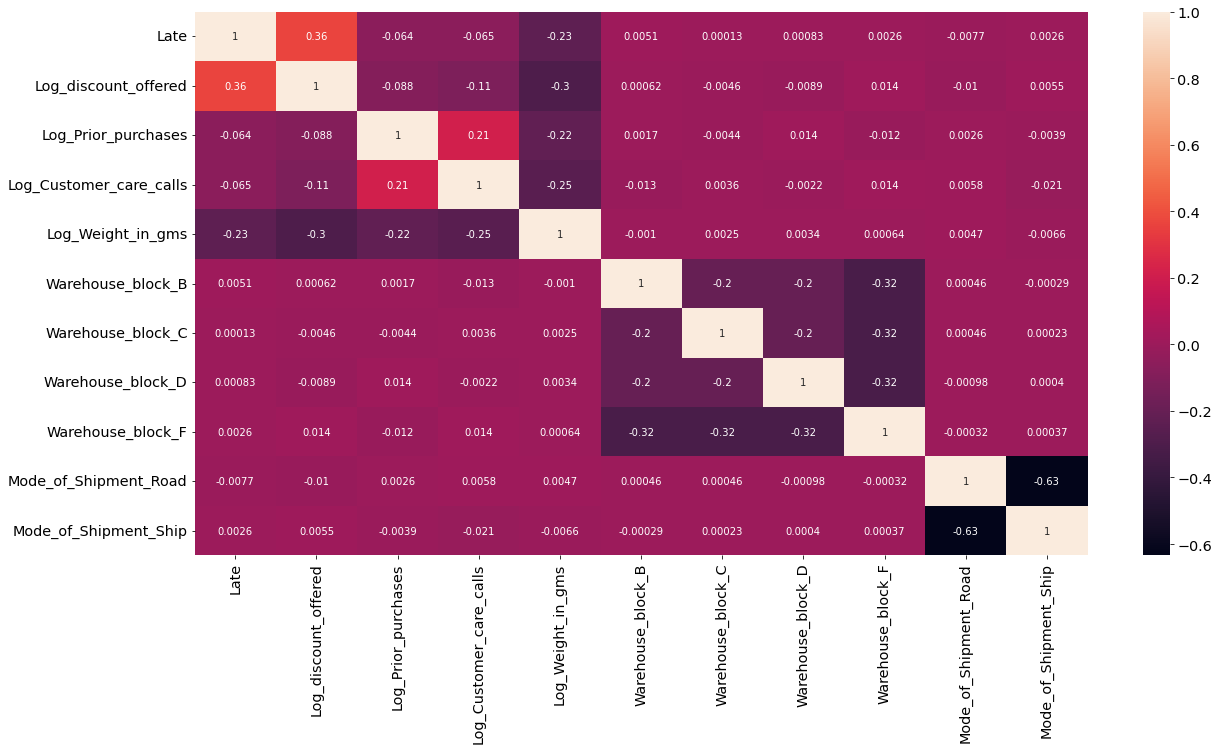

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(), annot=True)
plt.savefig('ftcorr.png', bbox_inches='tight', transparent=False)

Drop Customer_care_calls, Customer_rating to prevent data leakage.

In [64]:
df3.drop(['Customer_care_calls','Customer_rating'], axis=1, inplace=True)

In [65]:
df3.shape

(10999, 14)

Drop some original features (not the one hot encoded); which correlation coefficient with the target column is very low.

In [66]:
df3.drop(['Product_importance','Gender','Cost_of_the_Product'],axis=1, inplace=True)

In [67]:
df3.shape

(10999, 11)

### Modeling

In [68]:
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [69]:
lrc=LogisticRegression()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, proba, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, proba, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X=df3.drop('Late', axis=1).values
y=df3['Late'].values

In [74]:
print(X.shape)
print(y.shape)

(10999, 10)
(10999,)


In [75]:
X_train, X_test,  y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## logistic regression

In [76]:
lrc.fit(X_train, y_train)

LogisticRegression()

In [77]:
lrc_pred=lrc.predict(X_test)
lrc_proba=lrc.predict_proba(X_test)
lrc_proba=lrc_proba[:,1]

In [78]:
eval_classification(lrc, lrc_pred, lrc_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.67
Recall (Test Set): 0.75
F1-Score (Test Set): 0.71
AUC: 0.71


In [79]:
#Hyperparameter tuning
penalty = ['l2','l1','elasticnet','none']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)
lrc_tuned = RandomizedSearchCV(lrc, hyperparameters, cv=5, scoring='recall', random_state=42)

# Fitting Model & Evaluation
lrc_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.001, 0.002],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none']},
                   random_state=42, scoring='recall')

In [80]:
lrc_pred2=lrc_tuned.predict(X_test)
lrc_proba2=lrc_tuned.predict_proba(X_test)
lrc_proba2=lrc_proba2[:,1]

eval_classification(lrc_tuned, lrc_pred2, lrc_proba2, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 1.00
F1-Score (Test Set): 0.75
AUC: 0.70


# KNN

In [81]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
knn_pred=knn.predict(X_test)
knn_proba=knn.predict_proba(X_test)
knn_proba=knn_proba[:,1]

In [83]:
eval_classification(knn, knn_pred, knn_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.71
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
AUC: 0.71


In [84]:
#Hyperparameter tuning
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, scoring='recall', random_state=42)

knn_tuned.fit(X_train, y_train)
knn_pred2 = knn_tuned.predict(X_test)
knn_proba2 = knn_tuned.predict_proba(X_test)
knn_proba2 = knn_proba2[:,1]
eval_classification(knn_tuned, knn_pred2, knn_proba2, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.72
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
AUC: 0.71


## Random Forest

In [85]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
rfc_pred=rfc.predict(X_test)
rfc_proba=rfc.predict_proba(X_test)
rfc_proba=rfc_proba[:,1]

In [87]:
eval_classification(rfc, rfc_pred, rfc_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.72
Recall (Test Set): 0.68
F1-Score (Test Set): 0.70
AUC: 0.74


In [88]:
#Hyperparameter tuning
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )
rfc_tuned = RandomizedSearchCV(rfc, hyperparameters, cv=5, scoring='recall', random_state=42)
rfc_tuned.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                      

In [89]:
rfc_pred2=rfc_tuned.predict(X_test)
rfc_proba2=rfc_tuned.predict_proba(X_test)
rfc_proba2=rfc_proba2[:,1]

In [90]:
eval_classification(rfc_tuned, rfc_pred2, rfc_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.73
Recall (Test Set): 0.68
F1-Score (Test Set): 0.70
AUC: 0.74


## XGB

In [91]:
#XGB
xgb.fit(X_train, y_train)

[01:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
xgb_pred=xgb.predict(X_test)
xgb_proba=xgb.predict_proba(X_test)
xgb_proba=xgb_proba[:,1]

In [93]:
eval_classification(xgb, xgb_pred, xgb_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.76
Recall (Test Set): 0.66
F1-Score (Test Set): 0.70
AUC: 0.75


In [94]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv=5, scoring='recall', random_state=42)
xgb_tuned.fit(X_train,y_train)

[01:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.600

In [95]:
xgb_pred2=xgb_tuned.predict(X_test)
xgb_proba2=xgb_tuned.predict_proba(X_test)
xgb_proba2=xgb_proba2[:,1]
eval_classification(xgb_tuned, xgb_pred2, xgb_proba2, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.72
Recall (Test Set): 0.70
F1-Score (Test Set): 0.71
AUC: 0.73


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cf_matrix = confusion_matrix(y_test, xgb_pred2)
print(cf_matrix)

[[ 771  541]
 [ 589 1399]]


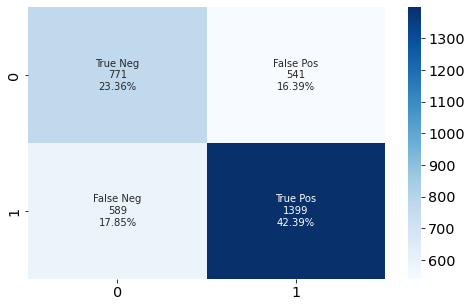

In [98]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('conf.png')

## Best Model
Dari performa model hasil hyperparameter tuning, direkomendasikan XGB dengan dengan nilai AUC 0.73 dan Recall 0.7.

### 